<a href="https://colab.research.google.com/github/mrivol/House-Pricing-Analysis---Group-8---3250/blob/master/Toronto_Covid_Income_%26_Race_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Setup
This section covers the notebook setup and data loading portion of the project. For the statistical analysis skip forward to the "What is a fair case-rate?" section of the notebook.



In [ ]:
# Package import
import pandas as pd
import numpy as np
import io

from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

from scipy.stats import binom

In [ ]:
# Authenticate
auth.authenticate_user()
drive_service = build('drive', 'v3')

In [ ]:
# Load data
file_id = '1hfYt1Wv_hL4U5JGzOH1-wbxqiqx1DAJp'

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('finished downloading')

finished downloading


In [ ]:
#BytesIO -> Excel workbook
exfile = pd.ExcelFile(downloaded)
# get sheets name
sheets = exfile.book.sheet_names()
# dictionary of dataframe 
ddf  ={ each : pd.read_excel(exfile,each) for each in sheets}

In [ ]:
display(list(ddf.keys()))

['Ethno-Racial Groups %',
 'Ethno-Racial Group case rate',
 'Income Group %',
 'Income Group case rate',
 'Overall Counts',
 'Ethno-racial montly %',
 'Ethno-racial monthly rate',
 'Income monthly %',
 'Income monthly rate']

# Data Preparation

  added fair rate, fare cases and covid rate to two dataframes: <br>
- income group dataframe: *`i_g_all`* 
- ethno-racial group: *`er_g_all `*

### Ethno-Racial group data

In [ ]:
# Etho group names
er_g = ddf['Ethno-Racial Groups %'] # etho-racial groups
er_g_all = er_g[er_g['Sex'] == 'All'].copy()
er_names = er_g_all['Ethno-Racial Group'].tolist()
er_names

['Arab, Middle Eastern or West Asian',
 'Black',
 'East Asian',
 'Latin American',
 'South Asian or Indo-Caribbean',
 'Southeast Asian',
 'White']

In [ ]:
# Exctract Ethno-Racial group population and cases.
er_tmp = er_g_all.set_index('Ethno-Racial Group') # reset index and stored in temp variable for easier access
er_pop =  {name: er_tmp.loc[name]['Population'] for name in er_names}
er_case = {name: er_tmp.loc[name]['Count of COVID-19 cases'] for name in er_names} 
#total population & total cases
er_tt_p = sum(er_pop.values())
er_tt_c = sum(er_case.values())
display('Population',er_pop)
display('Cases',er_case)
print('Total Population: {}, Total Cases: {}'.format(er_tt_p,er_tt_c))

'Population'

{'Arab, Middle Eastern or West Asian': 96350,
 'Black': 239850,
 'East Asian': 354515,
 'Latin American': 77165,
 'South Asian or Indo-Caribbean': 338970,
 'Southeast Asian': 194360,
 'White': 1282745}

'Cases'

{'Arab, Middle Eastern or West Asian': 1121,
 'Black': 2685,
 'East Asian': 533,
 'Latin American': 1174,
 'South Asian or Indo-Caribbean': 2814,
 'Southeast Asian': 1696,
 'White': 3007}

Total Population: 2583955, Total Cases: 13030


In [ ]:
# Add Fair Cases, Fair rate & covid rate to dataframe
er_g_all['Fair Cases'] = er_g_all['Population'] * er_tt_c / er_tt_p
er_g_all['Fair Rate'] = er_tt_c/er_tt_p
er_g_all['Fair Cases'] = er_g_all['Fair Cases'].astype(int)
er_g_all['Covid Rate'] = er_g_all['Count of COVID-19 cases']/er_g_all['Population']
er_g_all['Covid Index'] = er_g_all['Covid Rate']/er_g_all['Fair Rate']

# reset the index for final dataframe
er_g_all = er_g_all.reset_index().drop('index',axis = 1) 
er_g_all


,Ethno-Racial Group,Sex,Share of COVID-19 cases,Count of COVID-19 cases,Share of Toronto population,Population,Missing,Fair Cases,Fair Rate,Covid Rate,Covid Index
0,"Arab, Middle Eastern or West Asian",All,0.084343,1121,0.036105,96350,Analysis excludes those for whom the race ques...,485,0.005043,0.011635,2.307249
1,Black,All,0.202016,2685,0.089879,239850,Analysis excludes those for whom the race ques...,1209,0.005043,0.011194,2.219960
2,East Asian,All,0.040102,533,0.132847,354515,Analysis excludes those for whom the race ques...,1787,0.005043,0.001503,0.298149
3,Latin American,All,0.088330,1174,0.028914,77165,Analysis excludes those for whom the race ques...,389,0.005043,0.015214,3.017090
4,South Asian or Indo-Caribbean,All,0.211722,2814,0.127020,338970,Analysis excludes those for whom the race ques...,1709,0.005043,0.008302,1.646279
5,Southeast Asian,All,0.127605,1696,0.072832,194360,Analysis excludes those for whom the race ques...,980,0.005043,0.008726,1.730452
6,White,All,0.226243,3007,0.480683,1282745,Analysis excludes those for whom the race ques...,6468,0.005043,0.002344,0.464872


### Income group data

In [ ]:
# Income group names
i_g = ddf['Income Group %'] # Icome groups
i_g_all = i_g[i_g['Age group'] == 'All'].copy()
i_names = i_g_all['Income group'].tolist()
i_names

['$0 - $29,999',
 '$30,000 - $49,999',
 '$50,000 - $69,999',
 '$70,000 - $99,999',
 '$100,000 - $149,999',
 '$150,000 or more']

In [ ]:
# Income group population and cases.
i_tmp = i_g_all.set_index('Income group') # reset index and stored in temp variable for easier access
i_pop =  {name: i_tmp.loc[name]['Population'] for name in i_names}
i_case = {name: i_tmp.loc[name]['Count of COVID-19 Cases'] for name in i_names} 
#total population & total cases
i_tt_p = sum(i_pop.values())
i_tt_c = sum(i_case.values())
display('Population',i_pop)
display('Cases',i_case)
print('Total Population: {}, Total Cases: {}'.format(i_tt_p,i_tt_c))

'Population'

{'$0 - $29,999': 386130,
 '$100,000 - $149,999': 489885,
 '$150,000 or more': 565950,
 '$30,000 - $49,999': 404255,
 '$50,000 - $69,999': 379395,
 '$70,000 - $99,999': 466050}

'Cases'

{'$0 - $29,999': 1838,
 '$100,000 - $149,999': 865,
 '$150,000 or more': 639,
 '$30,000 - $49,999': 1810,
 '$50,000 - $69,999': 1227,
 '$70,000 - $99,999': 1161}

Total Population: 2691665, Total Cases: 7540


In [ ]:
# Add Fair Cases, Fair rate & Covid rate to dataframe
i_g_all['Fair Cases'] = i_g_all['Population'] * i_tt_c / i_tt_p
i_g_all['Fair Rate'] = i_tt_c/i_tt_p
i_g_all['Fair Cases'] = i_g_all['Fair Cases'].astype(int)
i_g_all['Covid Rate'] = i_g_all['Count of COVID-19 Cases']/i_g_all['Population']
i_g_all['Covid Index'] = i_g_all['Covid Rate']/i_g_all['Fair Rate']

# reset the index for final dataframe
i_g_all = i_g_all.reset_index().drop('index',axis = 1) 
i_g_all


,Income group,Age group,Share of COVID-19 cases,Count of COVID-19 Cases,Share of Toronto population,Population,Missing,Fair Cases,Fair Rate,Covid Rate,Covid Index
0,"$0 - $29,999",All,0.243767,1838,0.143454,386130,Analysis excludes those for whom the income qu...,1081,0.002801,0.004760,1.699267
1,"$30,000 - $49,999",All,0.240053,1810,0.150188,404255,Analysis excludes those for whom the income qu...,1132,0.002801,0.004477,1.598353
2,"$50,000 - $69,999",All,0.162732,1227,0.140952,379395,Analysis excludes those for whom the income qu...,1062,0.002801,0.003234,1.154523
3,"$70,000 - $99,999",All,0.153979,1161,0.173146,466050,Analysis excludes those for whom the income qu...,1305,0.002801,0.002491,0.889302
4,"$100,000 - $149,999",All,0.114721,865,0.182001,489885,Analysis excludes those for whom the income qu...,1372,0.002801,0.001766,0.630335
5,"$150,000 or more",All,0.084748,639,0.210260,565950,Analysis excludes those for whom the income qu...,1585,0.002801,0.001129,0.403063


## What is a fair case-rate?

If Covid-19 affects all groups equally, then the probability of someone from any particular group getting infected should be:

$$
\frac{\text{Total Covid-19 Cases} \times \text{Population of Group}}{\text{Population of All Groups (sum)}}
$$

However, if we look at the case rates across income or ehtno-racial group, we can see that it is not fair. So the question we try to solve with Hypothesis testing, is whether the difference is significant for us to say that the income or ethno-racial group affects the Covid-19 case rate (and not random).

**Note**: The COVID index refers to how much more likely a sample population is to test positive for COVID vs the fair rate.

In [ ]:
# Create one table of: Ethno-Racial Group|Fair Case Number|Actual Case Number|Covid Index
er_caseload = er_g_all[['Ethno-Racial Group','Fair Cases','Count of COVID-19 cases','Covid Index']]
er_caseload.sort_values(by='Covid Index', inplace=True, ascending=False)

# Create one table of: Income Group|Fair Case Number|Actual Case Number|Covid Index
i_caseload = i_g_all[['Income group','Fair Cases','Count of COVID-19 Cases','Covid Index']]
i_caseload.sort_values(by='Covid Index', inplace=True, ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


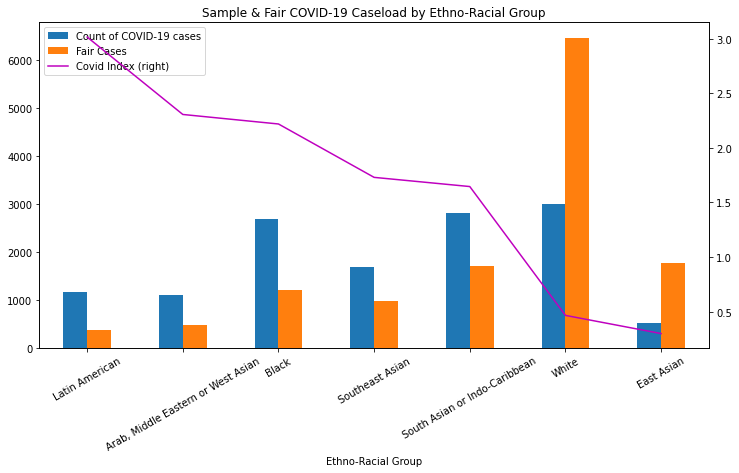

In [ ]:
# Create a plot for ethno-racial group so we can easily see if the Actual Case Number is above or below the Fair Case Number
ax = er_caseload.plot(x='Ethno-Racial Group',y=['Count of COVID-19 cases','Fair Cases'], kind='bar')
er_caseload.plot('Ethno-Racial Group','Covid Index', color='m', secondary_y=True, ax=ax, figsize = (12,6),title='Sample & Fair COVID-19 Caseload by Ethno-Racial Group', rot=30,legend=True)
plt.legend(['Count of COVID-19 cases','Fair Cases', "Covid Indexxx"])

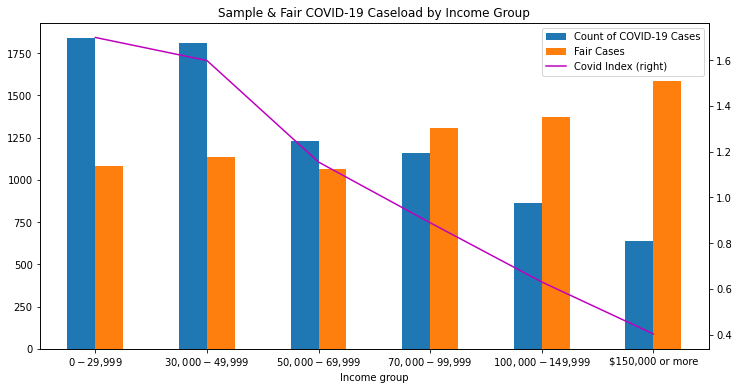

In [ ]:
ax = i_caseload.plot(x='Income group',y=['Count of COVID-19 Cases','Fair Cases'], kind='bar')
i_caseload.plot('Income group','Covid Index', color='m', secondary_y=True, ax=ax, figsize = (12,6),title='Sample & Fair COVID-19 Caseload by Income Group')

## Hypotheses

For each group, we need to determine the null and alternative hypothesis. The null hypothesis assumes the case rate is fair.

$
\text{Let } n_{group} \text{ be the population of the group}\\
\text{Let } n_{covid} \text{ be the total number of Covid-19 cases}\\
\text{Let } n_{all} \text{ be the sum of the populations of all groups}\\
\text{Let } X \text{ be the random variable } ``\text{number of Covid-19 cases within the group"} \text{ where } X \sim B(n_{group}, p) \\
$
$$
\begin{aligned}
H_0 &: &p = \frac{n_{covid}}{n_{all}}\\
\\
H_1 &: &p \ne \frac{n_{covid}}{n_{all}}
\end{aligned}
$$

## Two-Tailed Test

### Lower Tail

$
\begin{aligned}
\text{Reject } H_0 \text{ if } &P(X \le x_{lower}) \le \frac{1}{2}\alpha\\
\therefore x_{lower} ={} &Q(\frac{1}{2}\alpha, n_{group}, p)
\end{aligned}
$

### Upper Tail

$
\begin{aligned}
\text{Reject } H_0 \text{ if } &P(X \ge x_{upper}) \le \frac{1}{2}\alpha \\
1 - &P(X \le x_{upper} -1) \le \frac{1}{2}\alpha\\
&P(X \le x_{upper} -1) \ge 1 - \frac{1}{2}\alpha\\
\therefore x_{upper} ={} &Q(1-\frac{1}{2}\alpha, n_{group}, p) + 1
\end{aligned}
$

In [ ]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

alpha = 0.1

er_fair_prob = er_tt_c/er_tt_p
i_fair_prob = i_tt_c/i_tt_p

# Lower tail: lower x = binom.ppf(q=half alpha, n=population of group, p=fair probability)
# Upper tail: upper x = binom.ppf(q=1 - half alpha, n=population of group, p=fair probability)

# Determine tails for the different ethnic groups
eg_lower_tails = []
eg_upper_tails = []

for i in er_names:
  n = er_g_all[er_g_all['Ethno-Racial Group'] == i]['Population'].sum()
  eg_lower_tails.append(binom.ppf(q=alpha/2, n=n, p=er_fair_prob))
  eg_upper_tails.append(binom.ppf(q=1-alpha/2, n=n, p=er_fair_prob))

# Determine tails for the different income groups
i_lower_tails = []
i_upper_tails = []

for i in i_names:
  n = i_g_all[i_g_all['Income group'] == i]['Population'].sum()
  i_lower_tails.append(binom.ppf(q=alpha/2, n=n, p=i_fair_prob))
  i_upper_tails.append(binom.ppf(q=1-alpha/2, n=n, p=i_fair_prob))

# Append to Ethno-Racial Group Table (Lower Tail, Upper Tail): Ethno-Racial Group|Fair Case Rate|Actual Case Rate|Covid Index|Upper Tail|Lower Tail
eg_tail_df = pd.DataFrame(
    {'Ethno-Racial Group': er_names,
     'Lower tail': eg_lower_tails,
     'Upper tail': eg_upper_tails
    })

er_caseload_w_tails = er_caseload.merge(eg_tail_df)

# Append to Income Group Table (Lower Tail, Upper Tail): Income Group|Fair Case Rate|Actual Case Rate|Covid Index|Upper Tail|Lower Tail
i_tail_df = pd.DataFrame(
    {'Income group': i_names,
     'Lower tail': i_lower_tails,
     'Upper tail': i_upper_tails
    })

i_caseload_w_tails = i_caseload.merge(i_tail_df)

In [ ]:
# Show the table with lower and upper tails for ethnic groups
er_caseload_w_tails

,Ethno-Racial Group,Fair Cases,Count of COVID-19 cases,Covid Index,Lower tail,Upper tail
0,Latin American,389,1174,3.017090,357.0,422.0
1,"Arab, Middle Eastern or West Asian",485,1121,2.307249,450.0,522.0
2,Black,1209,2685,2.219960,1153.0,1267.0
3,Southeast Asian,980,1696,1.730452,929.0,1032.0
4,South Asian or Indo-Caribbean,1709,2814,1.646279,1642.0,1777.0
5,White,6468,3007,0.464872,6337.0,6601.0
6,East Asian,1787,533,0.298149,1719.0,1857.0


In [ ]:
# Show the table with lower and upper tails for income groups
i_caseload_w_tails

,Income group,Fair Cases,Count of COVID-19 Cases,Covid Index,Lower tail,Upper tail
0,"$0 - $29,999",1081,1838,1.699267,1028.0,1136.0
1,"$30,000 - $49,999",1132,1810,1.598353,1077.0,1188.0
2,"$50,000 - $69,999",1062,1227,1.154523,1010.0,1117.0
3,"$70,000 - $99,999",1305,1161,0.889302,1246.0,1365.0
4,"$100,000 - $149,999",1372,865,0.630335,1312.0,1433.0
5,"$150,000 or more",1585,639,0.403063,1520.0,1651.0


## Did Ethno-Racial Group or Income Group Affect Covid-19 Case-Rate?

Based on the above calculations we found the group to affect the case-rate.

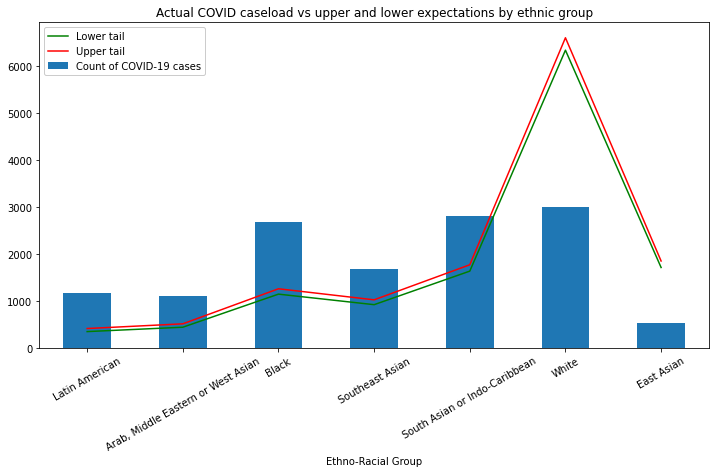

In [ ]:
# Create a plot for ethno-racial group so we can easily see for which groups the case-rate passed the upper or lower tail - all of them. Highlight these groups in our conclusion.
ax = er_caseload_w_tails.plot(x='Ethno-Racial Group',y=['Count of COVID-19 cases'], kind='bar')
plt = er_caseload_w_tails.plot('Ethno-Racial Group',['Lower tail','Upper tail'], color=['g','r'], ax=ax, figsize = (12,6),title='Actual COVID caseload vs upper and lower expectations by ethnic group', rot=30)
plt.legend(facecolor='white', framealpha=1)

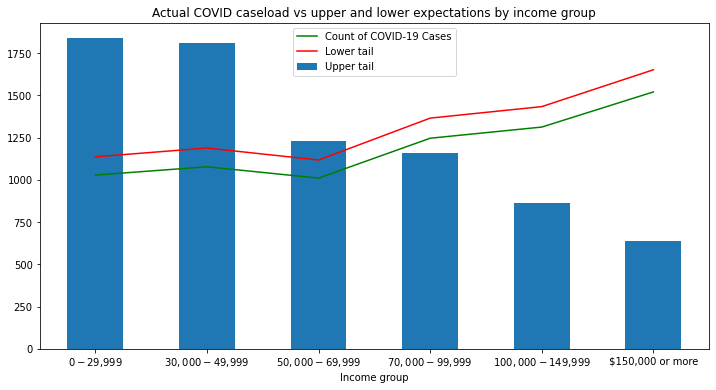

In [ ]:
# Create a plot for income group so we can easily see for which groups the case-rate passed the upper or lower tail - all of them. Highlight these groups in our conclusion.
ax = i_caseload_w_tails.plot(x='Income group',y=['Count of COVID-19 Cases'], kind='bar')
i_caseload_w_tails.plot('Income group',['Lower tail','Upper tail'], color=['g','r'], ax=ax, figsize = (12,6),title='Actual COVID caseload vs upper and lower expectations by income group')